# Computational Physics Tutorial 1

## SNGNKO003

## 1. Matrix Multiplication

We first import all the python libraries we are going use.

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import perf_counter

We define $\textit{n}$ as the number of rows that the Matrix $\textit{M}$ is going to have. Since $n = 5,10,20,100,1000$. We make an empty array with 5 sub-arrays such that $\textit{M}$ appends a Matrix for each value of $\textit{n}$.

In [100]:
n = [5, 10, 20, 100, 1000]               ### The number of rows of the Matrix and the dimension of the vector
n1 = n


###########################################################################
###                     Generating the matrix M                         ###
###########################################################################
M1 = [[],[],[],[],[]]
x1 = [[],[],[],[],[]]

for t in range(len(n)):
    for i in range(n[t]):
        M1[t].append([])
        x1[t].append(i+1)

        for j in range(n1[t]):                  
            M1[t][i].append(((37.1*(i+1) + 91.7*j**2) % 20.0) - 10.0)

print(np.array(M1[0]))    ## Printing the Matrix corresponding to n=5

[[ 7.1 -1.2 -6.1 -7.6 -5.7]
 [ 4.2 -4.1 -9.   9.5 -8.6]
 [ 1.3 -7.   8.1  6.6  8.5]
 [-1.6 -9.9  5.2  3.7  5.6]
 [-4.5  7.2  2.3  0.8  2.7]]


We manually define a function that multiplies Two Matrices $\textit{A}$, $\textit{B}$ that takes into account the dimensions of the arguments such that the number columns of the $\textit{A}$ must match the number of rows of the $\textit{B}$. The result will still be an $n\times n$ matrix.

In [101]:
###########################################################################
###          Defining a function that multiplies Two Matrices           ###
###########################################################################

def matrix_multiplication(A, B):
    # Get the number of rows and columns of A and B
    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0])

    # Check if the matrices can be multiplied
    if cols_A != rows_B:
        print("Matrices cannot be multiplied")
        return None

    # Create an empty result matrix with the correct dimensions
    C = [[0 for row in range(cols_B)] for col in range(rows_A)]

    # Perform matrix multiplication
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                C[i][j] += A[i][k] * B[k][j]

    return C

We manually define a function that multiplies Two Vectors (row_vector), (col_vector). Basically multiplies entries with the same index and sum over all of them. The result will be a scalar or a number.

In [102]:
###########################################################################
###           Defining a function that multiplies Two Vectors           ###
###########################################################################

def dot_product(row_vector, col_vector):
    """
    Multiplies a row vector and a column vector.
    
    Args:
    row_vector (list): A list representing the row vector.
    col_vector (list): A list representing the column vector.
    
    Returns:
    result (float): The product of the two vectors.
    """
    if len(row_vector) != len(col_vector):
        raise ValueError("Vectors must have the same length.")
    
    result = 0
    for i in range(len(row_vector)):
        result += row_vector[i] * col_vector[i]
    
    return result

We define a function that multiplies a matrix and a vector. The result will be a vector with $n$ components.

In [103]:
###########################################################################
###      Defining a fuction that multiplies a Matrix and a Vector       ###
###########################################################################

def matrix_vector_mult(M,x):
    y = np.zeros(M.shape[0])        # Making an array of zeros with dimensions to match the rows of the matrix
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            y[i] += M[i,j] * x[j]

    return y

We then use our functions defined prior to compute $\textbf{x}^T \textbf{x}$ and $\textbf{x}^T \textbf{M} \textbf{x}$. To compute the latter, we first apply the function that multiplies a matrix and a vector on $\textbf{M}$ and $\textbf{x}$ and then use the result as an argument, along with $\textbf{x}^T$ to the function that multiplies two vectors. To compute the former, we simply apply the function that multiplies two vectors using  $\textbf{x}^T$ and $\textbf{x}$ as arguments.

In [104]:
###########################################################################
# xT dot x and xT dot Mx for the defined functions for n = 5,10,20,100,1000
###########################################################################

xTx1 = []                
Mx1 = []
xMx1 = []

for t in range(len(n)):
    xTx1.append(dot_product(np.transpose(np.array(x1[t])), np.array(x1[t])))
    Mx1.append(matrix_vector_mult(np.array(M1[t]), np.array(x1[t])))
    xMx1.append(dot_product(np.transpose(np.array(x1[t])), Mx1[t]))

We present our results for $\textbf{x}^T \textbf{x}$ and $\textbf{x}^T \textbf{M} \textbf{x}$ for each $n$ in a Table using Pandas.

In [105]:
###########################################################################
# Tabulated results for xT dot x and xT dot Mx for the defined functions
###########################################################################

## Here we define a dictionary to store the data in a tabular form
data = {
    'n': n,
    'xT dot x': xTx1,
    'xt dot Mx': xMx1
}

df = pd.DataFrame(data)
print(df)

      n   xT dot x     xt dot Mx
0     5         55  4.125000e+02
1    10        385 -6.325000e+02
2    20       2870 -8.560000e+03
3   100     338350 -2.208500e+06
4  1000  333833500 -1.200694e+10


We generate the matrix again for the for the second but a larger sample of n so that we generate plots that look continuous.

In [106]:
n_ = np.arange(20, 201, 20)
n1_ = n_


###########################################################################
###                     Generating the matrix M                         ###
###########################################################################
if __name__ == '__main__':              ### This creates an empty List of Lists with a number of elements equal to the length of n
                                        
    n2 = len(n_)
    M = [[] for x in range(n2)]
    x = [[] for x in range(n2)]
# M = [[],[],[],[],[]]
# x = [[],[],[],[],[]]

for t in range(len(n_)):
    for i in range(n_[t]):
        M[t].append([])
        x[t].append(i+1)

        for j in range(n1_[t]):                  
            M[t][i].append(((37.1*(i+1) + 91.7*j**2) % 20.0) - 10.0)

To determine the execution times for both the custom defined functions and existing python packages, the perf_counter function was used to record time stamps for just before the operation started and time stamps for just when it ended for each n that was defined above. The execution times were then calculated as $EX_{time} = t_{stop} - t_{start}$ where $t_{start}$ and $t_{stop}$ are the start and stop times respectively. A dictionary of the execution times with their corresponding $\textbf{n}$ for both the custom and built-in packages was constructed. This was then done for each operation i.e. $\textbf{x}^T \textbf{x}$, $\textbf{Mx}$, $\textbf{x}^T \textbf{M} \textbf{x}$ and $\textbf{MM}$.

In [107]:
###########################################################################
# Tabulated results for xT dot x and xT dot Mx for the defined functions 
# and the execution times
###########################################################################

t1_start = []
t1_stop = []
t1_start_pkg = []
t1_stop_pkg = []
for t in range(len(n_)):
    t1_start.append(perf_counter())         # records the start time stamp
    dot_product(np.transpose(np.array(x[t])), np.array(x[t]))
    t1_stop.append(perf_counter())          # records the stop time stamp
    
    ### Execution time for the Python Package ###
    t1_start_pkg.append(perf_counter())     # records the start time stamp
    np.matmul(np.transpose(np.array(x[t])), np.array(x[t]))
    t1_stop_pkg.append(perf_counter())      # records the stop time stamp
 
ex_time1 = np.array(t1_stop)-np.array(t1_start)
ex_time1_pkg = np.array(t1_stop_pkg)-np.array(t1_start_pkg)
# print("Elapsed time during the dot product of two Vectors in seconds:", ex_time1)
# print("Elapsed time during the dot product of two Vectors using the Python Package in seconds:", ex_time1_pkg)

data_e1 = {                             # Creating the dictionary to quote the results
    'n': n_,
    'Execution time for the Custom Function': ex_time1,
    'Execution time for the numpy package': ex_time1_pkg 
}
df_e1 = pd.DataFrame(data_e1)
print(df_e1)

     n  Execution time for the Custom Function  \
0   20                                0.000049   
1   40                                0.000031   
2   60                                0.000041   
3   80                                0.000050   
4  100                                0.000062   
5  120                                0.000350   
6  140                                0.000089   
7  160                                0.000098   
8  180                                0.000107   
9  200                                0.000118   

   Execution time for the numpy package  
0                              0.000031  
1                              0.000017  
2                              0.000019  
3                              0.000022  
4                              0.000025  
5                              0.000049  
6                              0.000034  
7                              0.000036  
8                              0.000039  
9                            

In [108]:
t2_start = []
t2_stop = []
t2_start_pkg = []
t2_stop_pkg = []
for t in range(len(n_)):
    t2_start.append(perf_counter())
    matrix_vector_mult(np.array(M[t]), np.array(x[t]))
    t2_stop.append(perf_counter())
    
    ### Execution time for the Python Package ###
    t2_start_pkg.append(perf_counter())
    np.matmul(np.array(M[t]), np.array(x[t]))
    t2_stop_pkg.append(perf_counter())
 
ex_time2 = np.array(t2_stop)-np.array(t2_start)
ex_time2_pkg = np.array(t2_stop_pkg)-np.array(t2_start_pkg)
# print("Elapsed time during the mutliplication of a Matrix and a Vector in seconds:", ex_time2)
# print("Elapsed time during the mutliplication of a Matrix and a Vector using the Python Package in seconds:", ex_time2_pkg)

data_e2 = {
    'n': n_,
    'Execution time for the Custom Function': ex_time2,
    'Execution time for the numpy package': ex_time2_pkg 
}
df_e2 = pd.DataFrame(data_e2)
print(df_e2)

     n  Execution time for the Custom Function  \
0   20                                0.001324   
1   40                                0.001785   
2   60                                0.004605   
3   80                                0.008831   
4  100                                0.013048   
5  120                                0.032242   
6  140                                0.032130   
7  160                                0.050536   
8  180                                0.037982   
9  200                                0.039430   

   Execution time for the numpy package  
0                              0.000096  
1                              0.000196  
2                              0.000378  
3                              0.000584  
4                              0.002567  
5                              0.001523  
6                              0.002260  
7                              0.002112  
8                              0.002616  
9                            

In [109]:
t3_start = []
t3_stop = []
t3_start_pkg = []
t3_stop_pkg = []
for t in range(len(n_)):
    t3_start.append(perf_counter())
    dot_product(np.transpose(np.array(x[t])), matrix_vector_mult(np.array(M[t]), np.array(x[t])))
    t3_stop.append(perf_counter())
    
    ### Execution time for the Python Package ###
    t3_start_pkg.append(perf_counter())
    np.matmul(np.transpose(np.array(x[t])), np.matmul(np.array(M[t]), np.array(x[t])))
    t3_stop_pkg.append(perf_counter())
 
 
ex_time3 = np.array(t3_stop)-np.array(t3_start)
ex_time3_pkg = np.array(t3_stop_pkg)-np.array(t3_start_pkg)
# print("Elapsed time during the multiplication of two Vectors and a Matrix in seconds:", ex_time3)
# print("Elapsed time during the multiplication of two Vectors and a Matrix using the Python Package in seconds:", ex_time3_pkg)

data_e3 = {
    'n': n_,
    'Execution time for the Custom Function': ex_time3,
    'Execution time for the numpy package': ex_time3_pkg 
}
df_e3 = pd.DataFrame(data_e3)
print(df_e3)

     n  Execution time for the Custom Function  \
0   20                                0.001210   
1   40                                0.018607   
2   60                                0.003973   
3   80                                0.012220   
4  100                                0.018414   
5  120                                0.019549   
6  140                                0.023483   
7  160                                0.038003   
8  180                                0.045499   
9  200                                0.040869   

   Execution time for the numpy package  
0                              0.000118  
1                              0.000405  
2                              0.000394  
3                              0.000636  
4                              0.001667  
5                              0.001606  
6                              0.003652  
7                              0.009650  
8                              0.002673  
9                            

In [110]:
t4_start = []
t4_stop = []
t4_start_pkg = []
t4_stop_pkg = []
for t in range(len(n_)):
    t4_start.append(perf_counter())
    matrix_multiplication(np.array(M[t]), np.array(M[t]))
    t4_stop.append(perf_counter())
    
    ## Execution time for the Python Package ###
    t4_start_pkg.append(perf_counter())
    np.matmul(np.array(M[t]), np.array(M[t]))
    t4_stop_pkg.append(perf_counter())
 
ex_time4 = np.array(t4_stop)-np.array(t4_start)
ex_time4_pkg = np.array(t4_stop_pkg)-np.array(t4_start_pkg)
# print("Elapsed time during the multiplication of two Matrices: in seconds:", ex_time4)
# print("Elapsed time during the multiplication of two Matrices using the Python Package in seconds:", ex_time4_pkg)

data_e4 = {
    'n': n_,
    'Execution time for the Custom Function': ex_time4,
    'Execution time for the numpy package': ex_time4_pkg 
}
df_e4 = pd.DataFrame(data_e4)
print(df_e4)

     n  Execution time for the Custom Function  \
0   20                                0.007462   
1   40                                0.077440   
2   60                                0.220476   
3   80                                0.456443   
4  100                                1.019375   
5  120                                1.543023   
6  140                                2.425179   
7  160                                3.692740   
8  180                                5.197408   
9  200                                7.155726   

   Execution time for the numpy package  
0                              0.000131  
1                              0.000353  
2                              0.000903  
3                              0.001099  
4                              0.001658  
5                              0.002383  
6                              0.003397  
7                              0.005675  
8                              0.006361  
9                            

Tabulating the final results for the execution times as a function of n

In [111]:
###########################################################################
###      Tabulating the executions times for both Implementations       ###
###########################################################################

data1 = {
    'n': n_,
    'Execution Times for Manual Operation of xT . x (s)': ex_time1,
    'Execution Times for Python Packages of xT . x (s)': ex_time1_pkg,
    'Execution Times for Manual Operation of M . x (s)': ex_time2,
    'Execution Times for Python Packages of M . x (s)': ex_time2_pkg,
    'Execution Times for Manual Operation of xT . Mx (s)': ex_time3,
    'Execution Times for Python Packages of xT . Mx (s)': ex_time3_pkg,
    'Execution Times for Manual Operation of M . M (s)': ex_time4,
    'Execution Times for Python Packages of M . M (s)': ex_time4_pkg,
}

df1 = pd.DataFrame(data1)
print(df1)

     n  Execution Times for Manual Operation of xT . x (s)  \
0   20                                           0.000049    
1   40                                           0.000031    
2   60                                           0.000041    
3   80                                           0.000050    
4  100                                           0.000062    
5  120                                           0.000350    
6  140                                           0.000089    
7  160                                           0.000098    
8  180                                           0.000107    
9  200                                           0.000118    

   Execution Times for Python Packages of xT . x (s)  \
0                                           0.000031   
1                                           0.000017   
2                                           0.000019   
3                                           0.000022   
4                                    

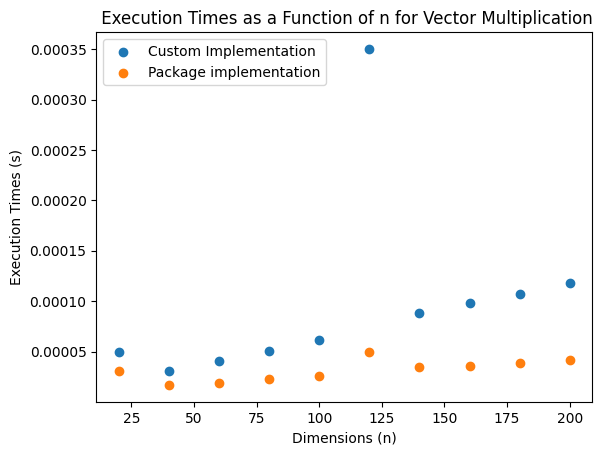

In [112]:
###########################################################################
###           Plotting the execution times as a function of n           ###
###########################################################################

plt.scatter(n_, ex_time1, label = "Custom Implementation", marker = 'o')
plt.scatter(n_, ex_time1_pkg, label = "Package implementation", marker = 'o')
plt.legend(loc = 'best')
plt.xlabel('Dimensions (n)')
plt.ylabel('Execution Times (s)')
plt.title(" Execution Times as a Function of n for Vector Multiplication")
plt.show()

In the above, we can clearly see that the built-in python package is faster than the my custom defined function. The expected asymptotic behaviour of the operation $\textbf{x}^T \textbf{x}$ should be $\mathcal{O}(n)$, of which we can see since we kind of have a straight line.

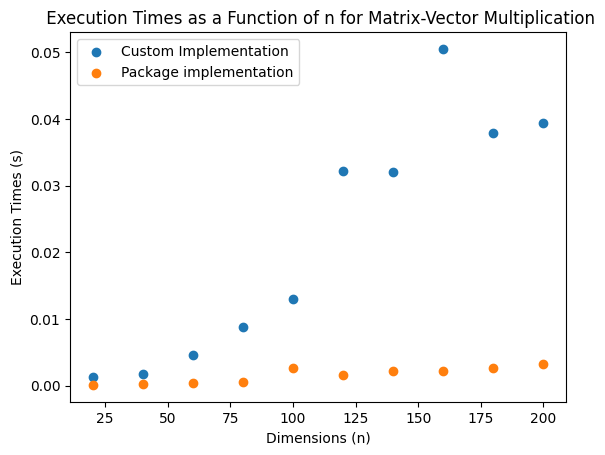

In [113]:
plt.scatter(n_, ex_time2, label = "Custom Implementation", marker = 'o')
plt.scatter(n_, ex_time2_pkg, label = "Package implementation", marker = 'o')
plt.legend(loc = 'best')
plt.xlabel('Dimensions (n)')
plt.ylabel('Execution Times (s)')
plt.title(" Execution Times as a Function of n for Matrix-Vector Multiplication")
plt.show()

In the above, we can clearly see that the built-in python package is faster than the my custom defined function. The expected asymptotic behaviour of the operation $\textbf{Mx}$ should be $\mathcal{O}(n^2)$, of which we can see since we kind of have a distribution that somewhat resembles a parabola for $n>0$.

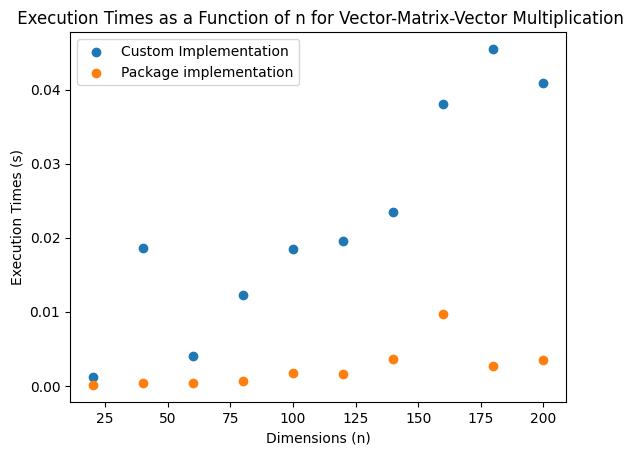

In [114]:
plt.scatter(n_, ex_time3, label = "Custom Implementation", marker = 'o')
plt.scatter(n_, ex_time3_pkg, label = "Package implementation", marker = 'o')
plt.legend(loc = 'best')
plt.xlabel('Dimensions (n)')
plt.ylabel('Execution Times (s)')
plt.title(" Execution Times as a Function of n for Vector-Matrix-Vector Multiplication")
plt.show()

In the above, we can clearly see that the built-in python package is faster than the my custom defined function. The expected asymptotic behaviour of the operation $\textbf{x}^T \textbf{Mx}$ should be $\mathcal{O}(n^2+n)$, we note that the $n^2$ term dominates such the expected asymptotic behaviour becomes  $\approx \mathcal{O}(n^2)$ of which we can see since we kind of have a distribution that somewhat resembles a parabola again, for $n>0$. 

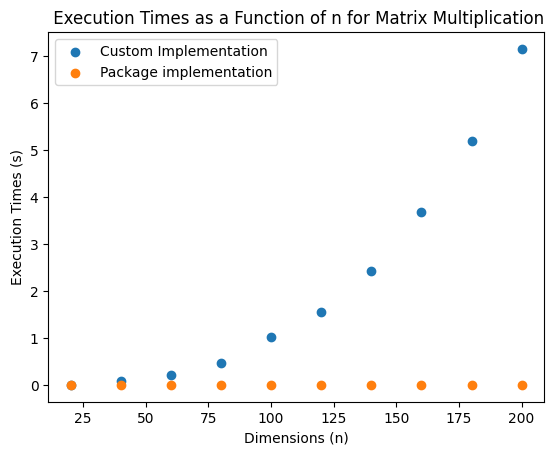

In [115]:
plt.scatter(n_, ex_time4, label = "Custom Implementation", marker = 'o')
plt.scatter(n_, ex_time4_pkg, label = "Package implementation", marker = 'o')
plt.legend(loc = 'best')
plt.xlabel('Dimensions (n)')
plt.ylabel('Execution Times (s)')
plt.title(" Execution Times as a Function of n for Matrix Multiplication")
plt.show()

In the above, we can clearly see that the built-in python package is much faster than the my custom defined function. The expected asymptotic behaviour of the operation $\textbf{MM}$ should be $\mathcal{O}(n^3)$, of which we can see since we kind of have a distribution that somewhat resembles a cubic graph for $n>0$.

In [116]:
flops_xtx = []
flops_mx = []
flops_xtmx = []
flops_mm = []
for t in range(len(n_)):
    flops_xtx.append((2*n_[t]**3)/ex_time1)
    flops_mx.append((2*n_[t]**3)/ex_time2)
    flops_xtmx.append((2*n_[t]**3)/ex_time3)
    flops_mm.append((2*n_[t]**3)/ex_time4)


data3 = {
    'xTx': flops_xtx,
    'Mx': flops_mx,
    'xTMx': flops_xtmx,
    'MM': flops_mm
}
df3 = pd.DataFrame(data3)
print(df3)

                                                 xTx  \
0  [323480651.86143416, 520545271.60207206, 39375...   
1  [2587845214.8914733, 4164362172.8165765, 31500...   
2  [8733977600.258722, 14054722333.255945, 106314...   
3  [20702761719.131786, 33314897382.53261, 252005...   
4  [40435081482.679276, 65068158950.25901, 492198...   
5  [69871820802.06978, 112437778666.04756, 850519...   
6  [110953863588.47192, 178547028159.5107, 135059...   
7  [165622093753.0543, 266519179060.2609, 2016045...   
8  [235817395206.98553, 379477502997.9105, 287050...   
9  [323480651861.4342, 520545271602.0721, 3937589...   

                                                  Mx  \
0  [12084856.843235789, 8962641.469767837, 347457...   
1  [96678854.74588631, 71701131.7581427, 27796562...   
2  [326291134.7673663, 241991319.68373162, 938133...   
3  [773430837.9670905, 573609054.0651416, 2223724...   
4  [1510607105.4044735, 1120330183.7209797, 43432...   
5  [2610329078.1389303, 1935930557.469853, 7505

To compute the FLOPS, We simply isolate one of the custom defined funtions and determine the number floating point operations then multiplu that number by the number of iterations for that specific input. We then devide the result but the execution time to get the number of Floating Point Operations of the system. In our case, we chose the $\textbf{dot product}$ operator which has to floating point operations and nested within 3 loops which means we have repeatitions of $\mathcal{O}(n^3)$. We choose our vector to have $n=20$.

In [117]:
FLOPS = 2*(n_[0]**3)/ex_time1[0]
print(FLOPS)

323480651.86143416


Here can see that our estimated number of floating point operations is $\approx 3 \times 10^8$.